<a href="https://colab.research.google.com/github/NazrawitGemechu/No-show-appointments_Nazrawit-Gemechu/blob/main/BigDataAnalysis_No_show_appointments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Wrangle Data

import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(url)

# Displaying the first few rows
print("Step 1: Gather Data - Displaying the first few rows:")
print(df.head())

Step 1: Gather Data - Displaying the first few rows:
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0          

In [ ]:
# Checking for missing values
print("\nAssess Data - Missing values:")
print(df.isnull().sum())


Assess Data - Missing values:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [ ]:
# Checking for duplicates
print("\nAssess Data - Duplicate rows:", df.duplicated().sum())


Assess Data - Duplicate rows: 0


In [ ]:
# Droping duplicate rows
df = df.drop_duplicates()

# Geting summary statistics for numerical columns
print("\nAssess Data - Summary statistics:")
print(df.describe())


Assess Data - Summary statistics:
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%    

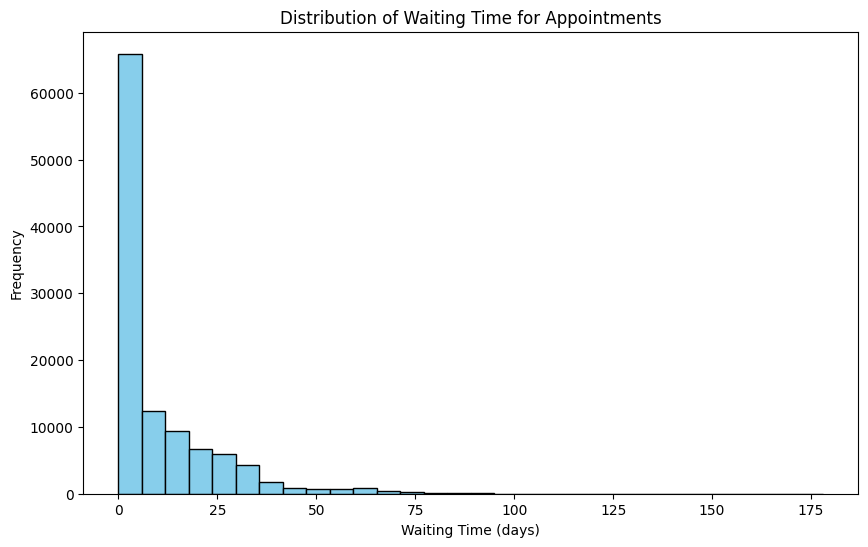

In [ ]:
#Cleaning Data

# Converting 'ScheduledDay' and 'AppointmentDay' to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Extracting day of the week from 'AppointmentDay'
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()

# Creating a new column 'WaitingTime' representing the number of days between scheduling and appointment
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Handling negative waiting times (appointments scheduled after the appointment day)
df['WaitingTime'] = df['WaitingTime'].apply(lambda x: 0 if x < 0 else x)

# Visualizing the distribution of waiting times
plt.figure(figsize=(10, 6))
plt.hist(df['WaitingTime'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Waiting Time for Appointments')
plt.xlabel('Waiting Time (days)')
plt.ylabel('Frequency')
plt.show()




Step 2: EDA - Distribution of No-show:


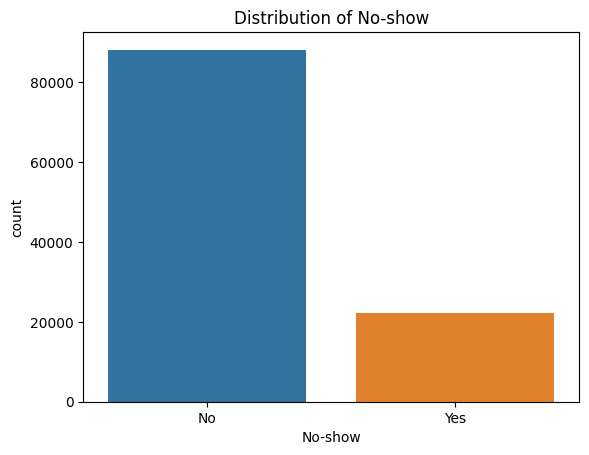

In [ ]:
# Step 2: Perform EDA (Exploratory Data Analysis)

import seaborn as sns

# Visualizin distribution of the target variable (No-show)
print("\nStep 2: EDA - Distribution of No-show:")
sns.countplot(x='No-show', data=df)
plt.title('Distribution of No-show')
plt.show()


EDA - Impact of Age on No-show:


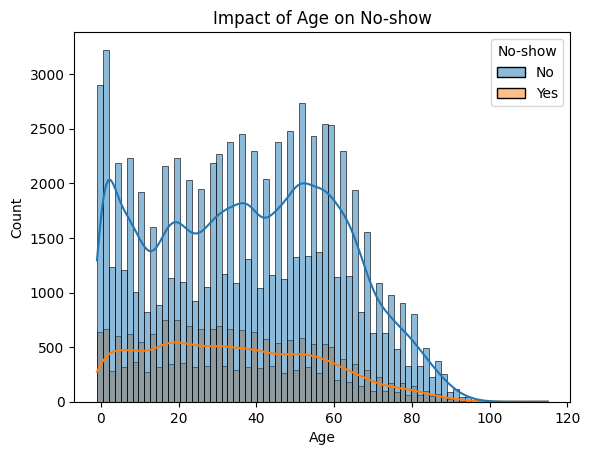

In [ ]:
# Exploring relationships between features and the target variable: visualizing the impact of age on no-show
print("\nEDA - Impact of Age on No-show:")
sns.histplot(x='Age', hue='No-show', data=df, kde=True)
plt.title('Impact of Age on No-show')
plt.show()

# Feature Engineering: Creating new features that may improve analysis:
# Extracting day of the week from the appointment date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()

In [ ]:
# Step 3: Draw Conclusions

# Calculating the overall no-show rate
no_show_rate = df['No-show'].value_counts(normalize=True)['Yes']
print("\nStep 3: Draw Conclusions - Overall No-show Rate:")
print(f"{no_show_rate:.2%}")



Step 3: Draw Conclusions - Overall No-show Rate:
20.19%

Draw Conclusions - No-show Rate by Day of the Week:
DayOfWeek
Friday       0.212261
Monday       0.206471
Saturday     0.230769
Thursday     0.193541
Tuesday      0.200936
Wednesday    0.196892
Name: Yes, dtype: float64


In [ ]:
# Prediction

# Importing necessary libraries for prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Performing one-hot encoding for the 'DayOfWeek' variable
X_encoded = pd.get_dummies(df[['Age', 'DayOfWeek', 'Scholarship']], columns=['DayOfWeek'], drop_first=True)

# Converting the target variable to binary
y = df['No-show'].map({'No': 0, 'Yes': 1})

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance
feature_importance = model.feature_importances_
features = X_encoded.columns
feature_importance_dict = dict(zip(features, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nPrediction - Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


Prediction - Feature Importance:
Age: 0.9248
Scholarship: 0.0296
DayOfWeek_Wednesday: 0.0121
DayOfWeek_Thursday: 0.0109
DayOfWeek_Tuesday: 0.0104
DayOfWeek_Monday: 0.0101
DayOfWeek_Saturday: 0.0021


In [ ]:
# Based on the feature importance, drawing a conclusion that answers the main question
# Age and Scholarship are important factors in predicting no-show

# Making predictions on the entire dataset
all_predictions = model.predict(X_encoded)

# Evaluate the model
all_accuracy = accuracy_score(y, all_predictions)
all_report = classification_report(y, all_predictions)

print(f"\nOverall Prediction - Accuracy: {all_accuracy:.2%}")
print("Overall Prediction - Classification Report:\n", all_report)


Overall Prediction - Accuracy: 79.82%
Overall Prediction - Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     88208
           1       0.54      0.00      0.01     22319

    accuracy                           0.80    110527
   macro avg       0.67      0.50      0.45    110527
weighted avg       0.75      0.80      0.71    110527

